1.Import the dataset and explore basic info (nulls, data types).

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv('/content/Titanic-Dataset.csv')

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Check data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [31]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


2.Handle missing values using mean/median/imputation.


In [32]:
#Impute 'Age' (numeric) with median
df['Age'].fillna(df['Age'].median(), inplace=True)

#Drop 'Cabin' (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

#Impute 'Embarked' (categorical) with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [33]:
# Show missing values after handling
print("\nMissing values after handling:\n")
print(df.isnull().sum())


Missing values after handling:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


3.Convert categorical features into numerical using encoding.


In [34]:
# Copy the original dataframe
df_encoded = df.copy()

#Label encode binary categorical feature: 'Sex'
le = LabelEncoder()
df_encoded['Sex'] = le.fit_transform(df_encoded['Sex'])  # male=1, female=0

#One-hot encode 'Embarked' (multi-category)
df_encoded = pd.get_dummies(df_encoded, columns=['Embarked'], drop_first=True)

In [35]:
# Show encoded DataFrame
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True


4.Normalize/standardize the numerical features.

In [36]:
# Select numeric columns to scale (excluding target variable 'Survived')
numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [37]:
# Preview the standardized DataFrame
print(df_encoded[numerical_features].head())

        Age      Fare    Pclass     SibSp     Parch
0 -0.565736 -0.502445  0.827377  0.432793 -0.473674
1  0.663861  0.786845 -1.566107  0.432793 -0.473674
2 -0.258337 -0.488854  0.827377 -0.474545 -0.473674
3  0.433312  0.420730 -1.566107  0.432793 -0.473674
4  0.433312 -0.486337  0.827377 -0.474545 -0.473674





5.Visualize outliers using boxplots and remove them.

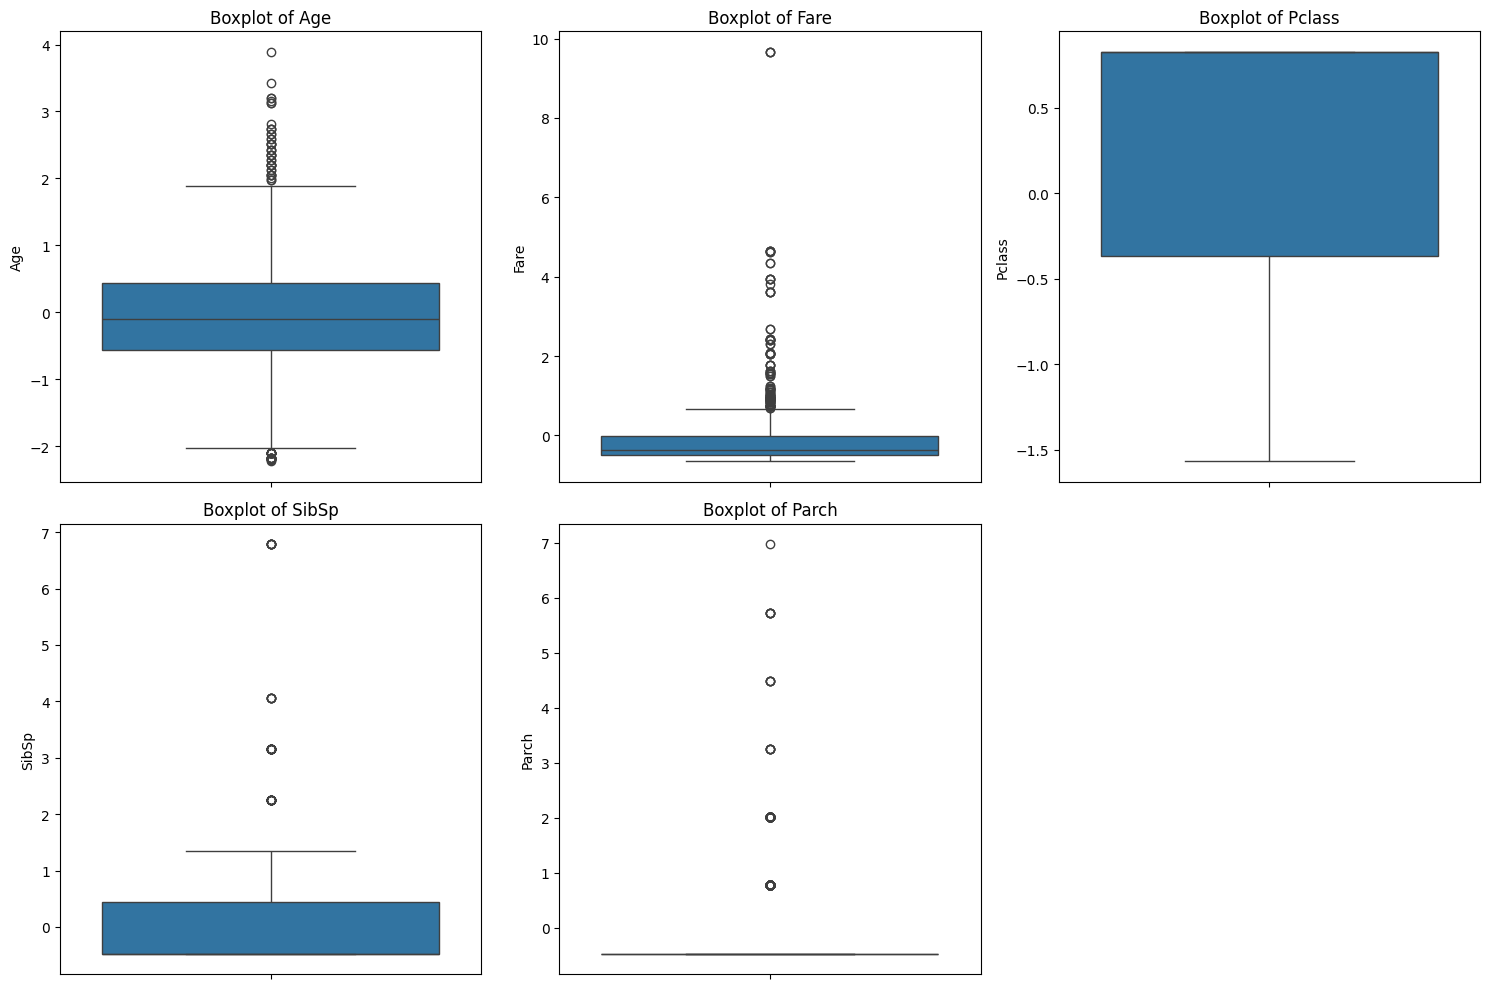

In [38]:
# Plot boxplots for each numerical feature
numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [39]:
#Removing outliers based on IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function
df_no_outliers = remove_outliers_iqr(df_encoded, numerical_features)

In [40]:
# Show the shape before and after
print("Shape before outlier removal:", df_encoded.shape)
print("Shape after outlier removal :", df_no_outliers.shape)

Shape before outlier removal: (891, 12)
Shape after outlier removal : (577, 12)
